In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

N, D = X.shape
print("(N, D) = ({}, {})".format(N, D))

(N, D) = (1797, 64)


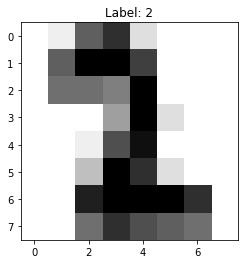

In [4]:
#print some random number
def plot_image(X, y):
    plt.imshow(X, cmap=plt.cm.gray_r)
    plt.title('Label: {}'.format(y))
    
rand = np.random.randint(0, N)
plot_image(X[rand].reshape(8,8), y[rand])

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
N_train, D_train = X_train.shape
N_test, D_test = X_test.shape

#normalize data
X_train = X_train/16.
X_test = X_test/16.

print("N_train, D_train: ", (N_train, D_train))
print("N_test, D_test: ", (N_test, D_test))


# train linear model and predict
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


# metrics - how good are we?
print("Accuracy on training set: {}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {}".format(lr.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
print(cm)

N_train, D_train:  (1257, 64)
N_test, D_test:  (540, 64)
Accuracy on training set: 0.9777247414478918
Accuracy on test set: 0.9611111111111111
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  1 59  0  1  0  1  3  1]
 [ 0  0  0  0 47  0  0  0  0  2]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  2  0  0  0  0 60  0  1  0]
 [ 0  0  0  0  0  0  0 57  0  1]
 [ 0  3  1  1  0  0  0  0 53  1]
 [ 0  0  0  0  0  0  0  0  1 52]]


Predicted value: 4


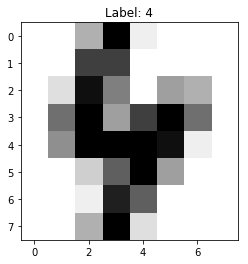

In [6]:
#plot some predicted images
rand = np.random.randint(0, X_test.shape[0])
plot_image(X_test[rand].reshape(8,8), y_test[rand])
print("Predicted value: {}".format(y_pred[rand]))

## MNIST Original

In [7]:
%%time
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)
CPU times: user 15.4 s, sys: 408 ms, total: 15.8 s
Wall time: 15.8 s


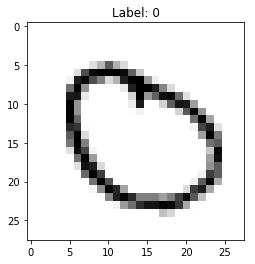

In [8]:
rand = np.random.randint(0, X.shape[0])
plot_image(X[rand].reshape(28,28), y[rand])

In [9]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
N_train, D_train = X_train.shape
N_test, D_test = X_test.shape

# normalize data
X_train = X_train/255
X_test = X_test/255

print("N_train, D_train: ", (N_train, D_train))
print("N_test, D_test: ", (N_test, D_test))


# train linear model and predict
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


# metrics - how good are we?
print("Accuracy on training set: {}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {}".format(lr.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
print(cm)

N_train, D_train:  (49000, 784)
N_test, D_test:  (21000, 784)
Accuracy on training set: 0.9286326530612244
Accuracy on test set: 0.9169047619047619
[[2020    1    3    6    4   10   14    2   14    1]
 [   1 2312   16    5    3   13    4    7   28    3]
 [  13   27 1838   35   20   15   21   21   55    7]
 [  15    9   48 1921    8   78    3   23   42   21]
 [   3    3    7    4 1865    3   18    6   24   62]
 [  21   13    9   70   27 1703   39    6   48   17]
 [  16   10   13    1   22   37 1959    2   11    0]
 [  10    9   34    6   20    7    1 2045    5   54]
 [  13   51   27   47   14   60   18   13 1753   30]
 [  13    7   11   33   61   19    0   77   17 1839]]
CPU times: user 2min 18s, sys: 27.6 s, total: 2min 46s
Wall time: 46.1 s


## Use Neural Network

In [10]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# normalize data
X_train = X_train/255
X_test = X_test/255

print("training data:", X_train.shape, y_train.shape)
print("test data:", X_test.shape, y_test.shape)

training data: (60000, 28, 28) (60000,)
test data: (10000, 28, 28) (10000,)


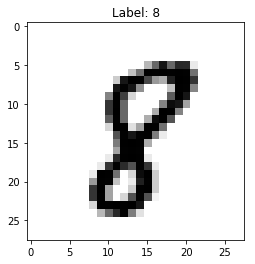

In [12]:
rand = np.random.randint(0, X_train.shape[0])
plot_image(X[rand].reshape(28,28), y[rand])

In [13]:
# convert calss to categorical
input_shape = (28,28,1)
output_shape = 10

X_train = X_train.reshape(list(X_train.shape)+[1,])
X_test = X_test.reshape(list(X_test.shape)+[1,])

print("prev: \n", y_train[:2])
y_train = keras.utils.to_categorical(y_train, output_shape)
y_test = keras.utils.to_categorical(y_test, output_shape)
print("now: \n", y_train[:2])

prev: 
 [5 0]
now: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
#build model 
model = keras.Sequential()
model.add(layers.Conv2D(16, 3, activation='relu', input_shape=input_shape))
model.add(layers.Conv2D(8, 3))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(output_shape, activation='softmax'))

#compile model 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#fit model 
model.fit(X_train, y_train, validation_data=(X_test, y_test))

#evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Loss:', score[0])
print('Accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
60000/60000 [==============================] - 18s 301us/sample - loss: 0.1945 - acc: 0.9420 - val_loss: 0.0843 - val_acc: 0.9740
Loss: 0.08430918136462569
Accuracy: 0.974


Predicted value: 2


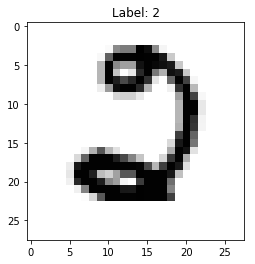

In [15]:
#plot some predicted images
rand = np.random.randint(0, X_test.shape[0])
X_to_pred = X_test[rand].reshape(28,28)
y_true = np.argmax(y_test[rand])
y_pred = model.predict(X_to_pred.reshape(1,28,28,1))
y_pred = np.argmax(y_pred)

plot_image(X_to_pred, y_true)
print("Predicted value: {}".format(y_pred))